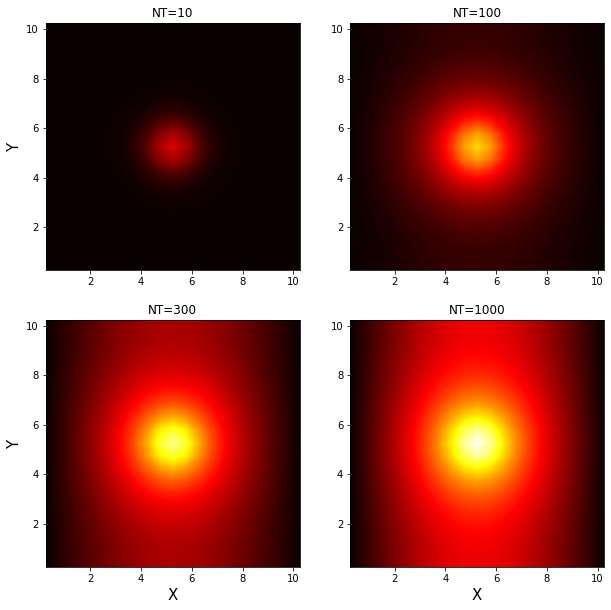

In [1]:
import numpy as np
import pylab as pl

tau = 0.05 #时间步长
h = 0.5 #空间步长
lamda = 1.0 
A = 1.0*tau/h**2
l = 10.0 #平板边长
NX = int(l/h) #空间节点数
NY = int(l/h) #空间节点数
NT = 1000 #时间步数

U = np.zeros([NX+1,NX+1,NT+1])  #温度
t = np.arange(0,NT,1)  #时间
x = np.arange(0,(NX+1)*h,h) #坐标
y = np.arange(0,(NY+1)*h,h) #坐标

U[0:NX,0:NX,0] = 0.0 #初始条件

for k in range(0,NT):
        
    for i in range(1,NX):
        for j in range(1,NY):
            U[i,j,k+1] = (1-4.0*A)*U[i,j,k]+ \
            A*(U[i+1,j,k]+U[i-1,j,k]+U[i,j+1,k]+U[i,j-1,k])+\
            tau*5.0*np.exp(-2.0*((i*h-5.0)**2+(j*h-5.0)**2))
            
# boundary condition
    U[0:NX+1,0,k+1] = U[0:NX+1,1,k+1]
    U[0:NX+1,NY,k+1] = U[0:NX+1,NY-1,k+1]
    U[0,0:NY+1,k+1] = 0.0
    U[NX,0:NY+1,k+1] = 0.0
#------------------------------------------
fig = pl.figure(figsize=(10,10))
ax1 =fig.add_subplot(2,2,1)
ax2 =fig.add_subplot(2,2,2)
ax3 =fig.add_subplot(2,2,3)
ax4 =fig.add_subplot(2,2,4)

extent = [0,(NX+1)*h,0,(NY+1)*h]
levels = np.arange(0.0,3.5,0.01)
cs1 = ax1.contourf(U[:,:,10].T,levels,origin='lower', extent=extent,cmap=pl.cm.hot)
cs2 = ax2.contourf(U[:,:,100].T,levels,origin='lower',extent=extent,cmap=pl.cm.hot)
cs3 = ax3.contourf(U[:,:,300].T,levels,origin='lower',extent=extent,cmap=pl.cm.hot)
cs4 = ax4.contourf(U[:,:,1000].T,levels,origin='lower',extent=extent,cmap=pl.cm.hot)

ax1.set_ylabel(r'Y', fontsize=15)
ax3.set_xlabel(r'X', fontsize=15)
ax3.set_ylabel(r'Y', fontsize=15)
ax4.set_xlabel(r'X', fontsize=15)
ax1.set_title('NT=10')
ax2.set_title('NT=100')
ax3.set_title('NT=300')
ax4.set_title('NT=1000')
pl.show()